# Workbook 00 - Solving beams with `PyNite`

In [25]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model


# Task 01

Create a `FEModel3D` object to analyze the following beam, where the green loads represent dead load and the orange load represents live load:

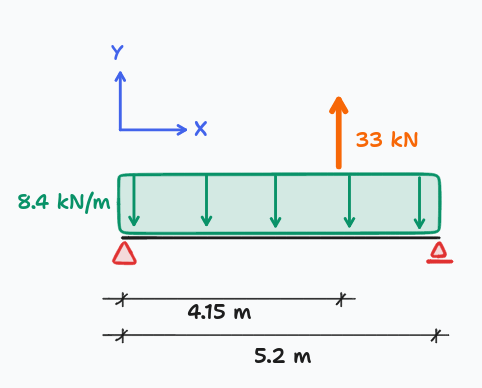

The beam is to have the following attributes:

```
E = 23000 MPa
Iz = 400e6 MPa
```

* Use `print()` to print the reactions
* Plot the shear diagram
* PLot the moment diagram

## Task 01 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+-----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  |  Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+-----------+
|       LC1        |   0    |   0    |  -5.9e+04 | 5.9e+04  |   0    |   0    |   0    |    0    |   0    |    0    | -1.53e+08 |  1.53e+08 |
|       LC2        |   0    |   0    | -9.47e+03 | 9.47e+03 |   0    |   0    |   0    |    0    |   0    |    0    |  5.21e+07 | -5.21e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+-----------+



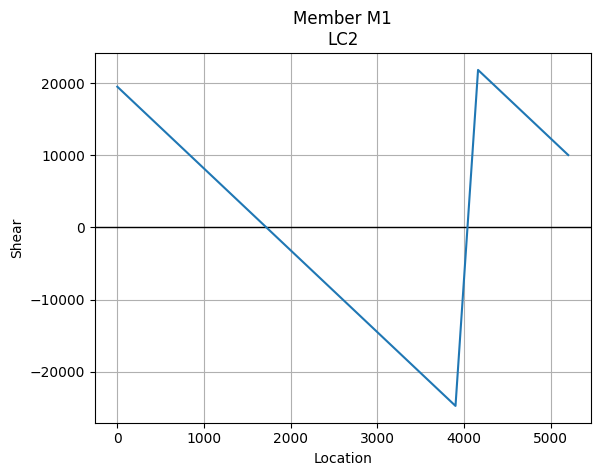

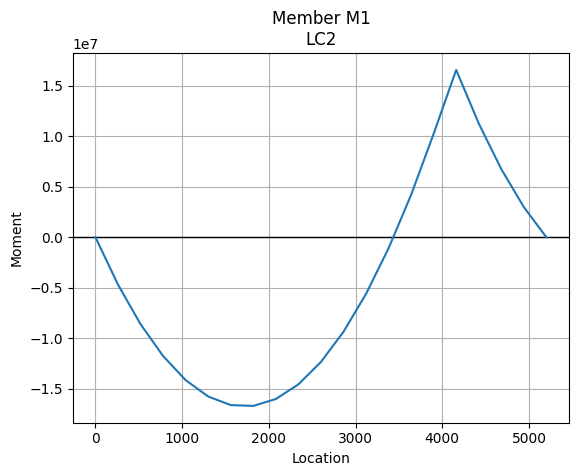

{'LC1': 29484.0, 'LC2': 19488.80769230769}
{'LC1': 29484.000000000007, 'LC2': -10020.807692307688}


In [6]:
# This is me completing the workbook
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", 5200, 0, 0)

beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=200e3, G=77e3, Iy=20e6, Iz=400e6, J=30e3, A=1500)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node2", False, True, True, False, False, False)

beam_model.add_load_combo(name="LC1", factors={"D": 1.35})
beam_model.add_load_combo("LC2", {"D": 1.35, "L": 1.5})

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-8.4, w2=-8.4, x1=0, x2=5200, case="D")
beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=33000, x=4150, case="L")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear("Fy", combo_name="LC2")
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC2")
# beam_model.Members['M1'].plot_deflection('dy', combo_name='LC2')

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)

# render_model(beam_model, combo_name='LC2', annotation_size=500)

# Task 02

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 3.6 m long
* 45 MPa concrete, 300x600 dp beam
* Fixed support @:
    * 0 m  
* Loads as follows:
    * UDL of self-weight
    * UDL of 60 kN/m Live load
    * Point load of 175 kN @ 2.2 m Live load
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

Note: You will need to calculate the E and I of the beam. You can use whatever code calculations you like but remember you need to keep your force/distance/stress units consistent across all inputs in order for the results to make sense.

## Task 02 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -3.29e+05 | 3.29e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -5.93e+08 | 5.93e+08 |
|       LC2        |   0    |   0    | -5.92e+05 | 5.92e+05 |   0    |   0    |   0    |    0    |   0    |    0    | -1.17e+09 | 1.17e+09 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+



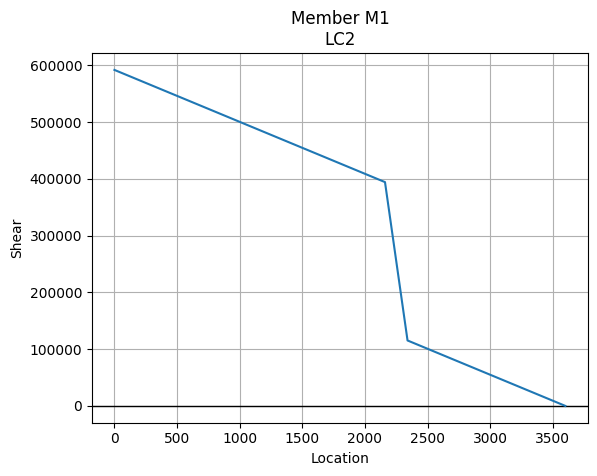

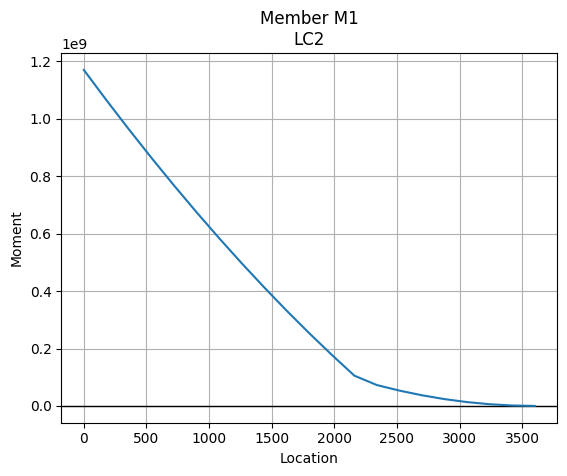

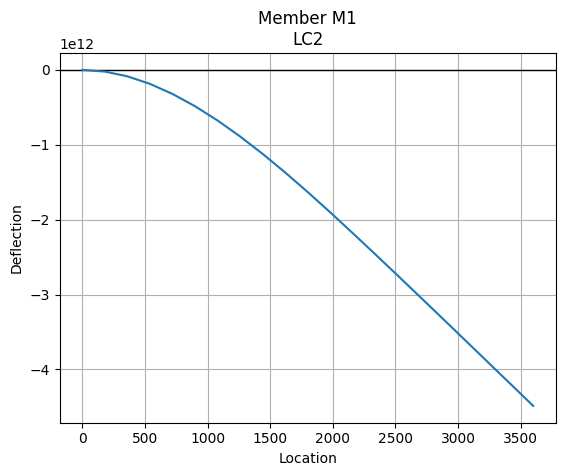

{'LC1': 329391.36000000004, 'LC2': 591891.3599999999}
{'LC1': 0.0, 'LC2': 0.0}


In [15]:
# This is me completing the workbook
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", 3600, 0, 0)

#Calculate E
fc = 45  # Compressive strength in MPa
unit_weight = 24  # Unit weight in kN/m^3
w_c = unit_weight / 1000  # Convert to kN/m^3
f_c = fc * 1000  # Convert to kN/m^2
# Calculate E
E = 4700 * ((f_c ** 0.5) * (w_c ** 0.5))

# Define the properties of the beam
L = 3.6  # Length in meters
b = 0.3  # Width in meters
h = 0.6  # Height in meters
Iz = b * h ** 3 / 12  # Moment of inertia about the z-axis (major axis)
A = b * h  # Cross-sectional area

# beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=200e3, G=77e3, Iy=20e6, Iz=400e6, J=30e3, A=1500)
beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=E, G=77e3, Iy=20e6, Iz=Iz, J=30e3, A=A)

beam_model.def_support("node1", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=True, support_RZ=True)
beam_model.def_support("node2", False, False, False, False, False, False)

beam_model.add_load_combo(name="LC1", factors={"D": 1.35})
beam_model.add_load_combo("LC2", {"D": 1.35, "L": 1.5})

self_weight = A * 24 * L / 2  # UDL of self-weight

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-self_weight, w2=-self_weight, x1=0, x2=3600, case="D")
beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-60, w2=-60, x1=0, x2=3600, case="D")
beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=-175000, x=2200, case="L")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear("Fy", combo_name="LC2")
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC2")
beam_model.Members['M1'].plot_deflection('dy', combo_name='LC2')

print(beam_model.Nodes['node1'].RxnFY)
print(beam_model.Nodes['node2'].RxnFY)

# render_model(beam_model, combo_name='LC2', annotation_size=500)

# Task 03

**Option A:** If you are from the US and want to try using US units:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 168 inches long
* E and Iz are 58e3 ksi and 1200 ${in^4}$, respectively
* Vertical supports @:
    * 24 inches, 96 inches, 132  inches
* Loads as follows:
    * Point load: 5 kips, @ 48 inches
    * Uniform distributed load: 60 lbs/inch starting @ 12 inches, ending @ 120 inches
    
    
**Option B:** If you are from pretty much anywhere else:

Create a `FEModel3D` object to analyze a beam with the following attributes:
* 4200 mm long
* E and Iz are 200e3 ksi and 854e6 ${mm^4}$, respectively
* Vertical supports @:
    * 600 mm, 2440 mm, 3350 mm
* Loads as follows:
    * Point load: 25 kN, @ 1200 inches
    * Uniform distributed load: 2.4 kN starting at 300 mm, ending @ 3000 mm
    
1. Use `print()` to print the reactions
2. Plot the shear and moment diagrams
3. Plot the deflection

## Task 03 Response

+----------------+
| Statics Check: |
+----------------+

+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
| Load Combination | Sum FX | Sum RX |   Sum FY  |  Sum RY  | Sum FZ | Sum RZ | Sum MX | Sum RMX | Sum MY | Sum RMY |   Sum MZ  | Sum RMZ  |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+
|       LC1        |   0    |   0    | -8.75e+03 | 8.75e+03 |   0    |   0    |   0    |    0    |   0    |    0    | -1.44e+07 | 1.44e+07 |
|       LC2        |   0    |   0    | -4.62e+04 | 4.62e+04 |   0    |   0    |   0    |    0    |   0    |    0    | -5.94e+07 | 5.94e+07 |
+------------------+--------+--------+-----------+----------+--------+--------+--------+---------+--------+---------+-----------+----------+



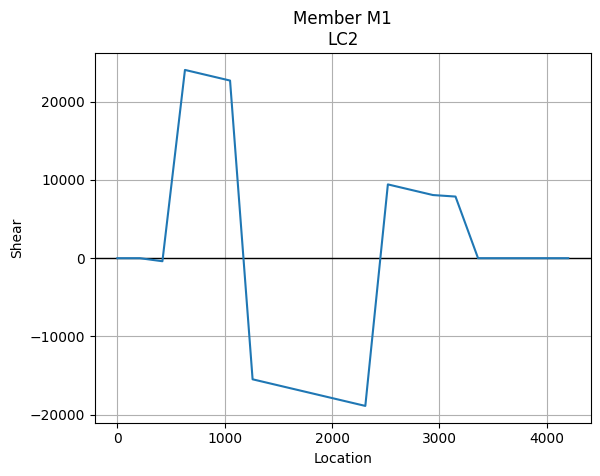

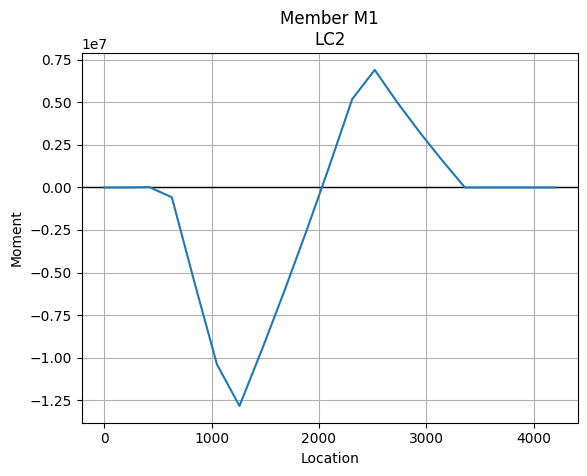

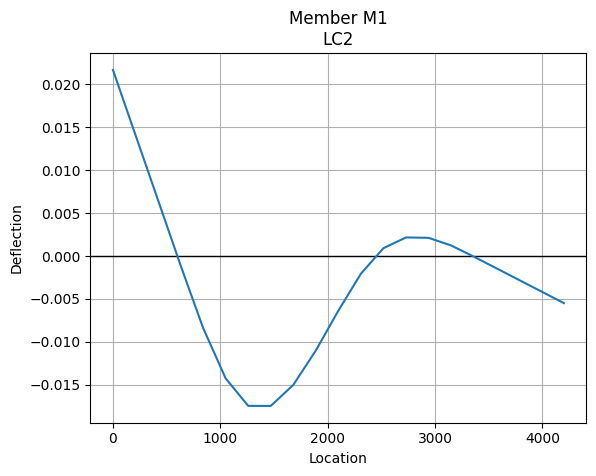

{'LC1': 3516.1511401641824, 'LC2': 25131.97860192737}
{'LC1': 3516.1511401641824, 'LC2': 25131.97860192737}
{'LC1': -484.83725505264, 'LC2': -7877.0102993996015}


In [24]:
# This is me completing the workbook
beam_model = FEModel3D() # Creates an empty model

beam_model.add_node(name="node1", X=0, Y=0, Z=0) # Change the model by adding nodes
beam_model.add_node("node2", 4200, 0, 0)
beam_model.add_node("node3", 600, 0, 0)
beam_model.add_node("node4", 2440, 0, 0)
beam_model.add_node("node5", 3350, 0, 0)


# beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=200e3, G=77e3, Iy=20e6, Iz=400e6, J=30e3, A=1500)
beam_model.add_member(name="M1", i_node="node1", j_node="node2", E=200e3, G=77e3, Iy=20e6, Iz=854e6, J=30e3, A=1000)

beam_model.def_support("node3", support_DX=True, support_DY=True, support_DZ=True, support_RX=True, support_RY=False, support_RZ=False)
beam_model.def_support("node4", support_DX=True, support_DY=True, support_DZ=True, support_RX=False, support_RY=False, support_RZ=False)
beam_model.def_support("node5", support_DX=True, support_DY=True, support_DZ=True, support_RX=False, support_RY=False, support_RZ=False)


beam_model.add_load_combo(name="LC1", factors={"D": 1.35})
beam_model.add_load_combo("LC2", {"D": 1.35, "L": 1.5})

beam_model.add_member_dist_load(Member="M1", Direction="Fy", w1=-2.4, w2=-2.4, x1=300, x2=3000, case="D")
beam_model.add_member_pt_load(Member="M1", Direction="Fy", P=-25000, x=1200, case="L")

beam_model.analyze(check_statics=True) # Changes the model by performing the analysis and adding analysis results

beam_model.Members['M1'].plot_shear("Fy", combo_name="LC2")
beam_model.Members['M1'].plot_moment(Direction="Mz", combo_name="LC2")
beam_model.Members['M1'].plot_deflection('dy', combo_name='LC2')

print(beam_model.Nodes['node3'].RxnFY)
print(beam_model.Nodes['node3'].RxnFY)
print(beam_model.Nodes['node5'].RxnFY)


render_model(beam_model, combo_name='LC2', annotation_size=500)

# 🧳 Submit Workbook 00!

We will use this procedure for submitting all Workbooks in this course. This one is going to be the "practice" submission.

[Log in to Eduflow](https://app.eduflow.com/login) and, in your PfSE course, see the **Workbook 00 Submission** instructions.